In [7]:
# Stephen.Griffies@noaa.gov
# SST from models and observational products 

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import mplsettings

from datetime import timedelta

print("numpy version  : ", np.__version__)
print("pandas version : ", pd.__version__)
print("xarray version : ", xr.__version__)

numpy version  :  1.26.4
pandas version :  2.2.3
xarray version :  2025.3.1


In [9]:
#dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
dirstix = "../../common/static_ttf"

import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [10]:
ds = xr.open_mfdataset('oisst_weighted_mean.nc') 
oisst_weighted_mean = ds['oisst_weighted_mean']

ds = xr.open_mfdataset('tosga_002.nc') 
tosga_002 = ds['tosga_002']

ds = xr.open_mfdataset('tosga_209_313.nc') 
tosga_209_313 = ds['tosga_209_313']

ds = xr.open_mfdataset('tosga_210_230_306.nc') 
tosga_210_230_306 = ds['tosga_210_230_306']

ds = xr.open_mfdataset('tosga_231_232.nc') 
tosga_231_232 = ds['tosga_231_232']

ds = xr.open_mfdataset('tosga_255_293.nc') 
tosga_255_293 = ds['tosga_255_293']

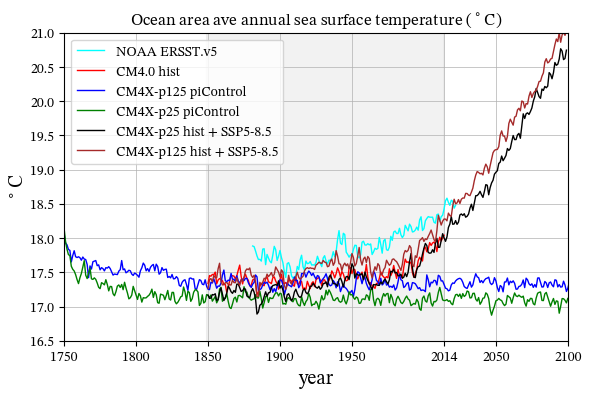

In [11]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(6.5,4.0))

oisst_weighted_mean[27:].plot.line(ax=axis, label='NOAA ERSST.v5',linestyle='solid', color='cyan', linewidth=1) 
tosga_002.plot.line(ax=axis, label='CM4.0 hist',linestyle='solid', color='red', linewidth=1) 
tosga_209_313.plot.line(ax=axis, label='CM4X-p125 piControl',linestyle='solid', color='blue', linewidth=1) 
tosga_210_230_306.plot.line(ax=axis, label='CM4X-p25 piControl',linestyle='solid', color='green', linewidth=1) 
tosga_231_232.plot.line(ax=axis, label='CM4X-p25 hist + SSP5-8.5',linestyle='solid', color='black', linewidth=1) 
tosga_255_293.plot.line(ax=axis, label='CM4X-p125 hist + SSP5-8.5',linestyle='solid', color='brown', linewidth=1) 

axis.legend(loc='upper left')
axis.set_ylim([16.5,21])
axis.set_xlim(1750,2100)

axis.set_xlabel('year', fontsize=14)
axis.set_ylabel(r'$^\circ$C',fontsize=14, labelpad=1)

axis.grid(linewidth=.5)
plt.xticks(ticks=[1750, 1800, 1850, 1900, 1950, 2014, 2050, 2100])

axis.fill_between(tosga_209_313['year'].values, 0, tosga_209_313['year'].values,
                  where=((tosga_209_313['year'] >= 1850) & (tosga_209_313['year'] <= 2014)),
                  interpolate=True, color='gray', alpha=0.1)

axis.set_title(r'Ocean area ave annual sea surface temperature ($^\circ$C)')
fig.savefig('Fig17_tosga_CM4X.jpg', bbox_inches='tight', dpi=400, format='jpeg')